<h1 style="text-align: center;">Berkshire Hathway Business Understanding</h1>

---

## Berkshire Hathway has been long know for creating amazing records, and to also beat the S&P500 for a long time by itself. 

![Berkshire Main Council](https://images.mktw.net/im-461638/horizontal?width=540&size=1.778975741239892)

It's been guiden through time with expertise by **Warren Buffet** and **Charlie Munger**. Two incredible businessman, both with a great hunch to beat the markets.



Throughout board meetings it's quite clear how they both invest and here's how you easily understand their strategies.
1. They only invest on **what they understand and believe in.**
   - There's no such thing as luck when talking about their results, they go out and try to find the best way to understand a business model.
   - Incredibly, Buffet don't usually invest in very new tech stocks because, by his words: "It's 'extraordinary' but don't know if it's 'beneficial"
2. They like to very clear contact with the management team of each company they choose to invest on.
   - By his huge portfolio and reputation, Buffet has easy access to the companies that he invests in, consequentely he get's in touch with the CEO's, CTO's, and etc.
3. The **value strategy**.
   - Based mainly on Ben Graham books, Buffet loves to calculate the actual value of a company when he get's in, and if it's undervalued, there's no reason to not buy it, that's his secret.
4. **Long-Term** Investment Approach: He usually hold his investments for a long time, so any good ideas might flurish upon that time


---

<h2 style="text-align: center;">How are they able to beat the market in such a huge margin?</h2>

For all whom lived the markets, it's a fact that the main thing that drives the market are **human emotions**. So how is Buffet so good in **beating everyone around him for such a long time?** That's the objective of this project.

Making a brief summary, in this project you will learn about:

- 🧠 Problem understanding
- 🔎 Sampling
- 🎲 Data wrangling
- 📊 Data visualization
- 🤔 Hypothesis tests
- 💲  Monte Carlo Simulations
- 📈 Evaluation metrics
- 🤩 Revenue Metrics

---

<h2 style="text-align: center;">Problem Understanding</h2>

First, we need to see how much better does Hathway when compared to the market S&P.

The dataset has been previously cut into two pieces, but **the main data** my be found [here](https://www.kaggle.com/datasets/lucastrenzado/berkshire-hathaway-vs-sp500)

Let's start looking at basic metrics.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Loading Data

In [57]:
berkshire = pd.read_csv('data/berkshire.csv')
s_p = pd.read_csv('data/s&p.csv')

## Common Terms in Stocks: 
- Close Price: It's the last price of the ticker in a given day;
- Open Price: it's the opening price of the ticker in a given day;
- Low: It's the lowest price of the day;
- High: It's the highest price of the day;
  
These info are usually used to create candle sticks graph 

### Basic Statistics and Charts

In [58]:
s_p.describe()

,close_SP500,high_SP500,low_SP500,open_SP500
count,6290.000000,6290.000000,6290.000000,6290.000000
mean,3224.032028,3236.920150,3209.128201,3223.553406
std,2159.776846,2175.150073,2142.784668,2159.704065
min,1095.040039,1095.040039,1095.040039,1095.040039
25%,1752.834991,1754.790009,1749.660004,1752.834991
50%,2173.435059,2177.099976,2168.064941,2172.565063
75%,4063.962463,4082.212463,4048.630066,4066.072571
max,10050.410156,10097.299805,10014.480469,10067.740234


In [59]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df2 = s_p

fig = go.Figure(data=[go.Candlestick(x=df2['date'],
                open=df2['open_SP500'],
                high=df2['high_SP500'],
                low=df2['low_SP500'],
                close=df2['close_SP500'])])
fig.update_layout(
    title='S&P Candle Stick',
    yaxis_title=' Index'
)

fig.show()

In [60]:
berkshire.describe()

,close_BRK,high_BRK,low_BRK,open_BRK
count,6290.000000,6290.000000,6290.000000,6290.000000
mean,110.169239,110.972693,109.303883,110.193831
std,73.651772,74.164574,73.121726,73.693133
min,27.400000,28.299999,27.020000,27.840000
25%,55.104999,55.500000,54.825000,55.180000
50%,79.355000,79.884998,78.739998,79.379997
75%,147.735004,148.529999,146.697498,147.855000
max,359.570007,362.100006,355.529999,361.390015


In [61]:
df3 = berkshire

fig = go.Figure(data=[go.Candlestick(x=df3['date'],
                open=df3['open_BRK'],
                high=df3['high_BRK'],
                low=df3['low_BRK'],
                close=df3['close_BRK'])])
fig.update_layout(
    title='BerkShire Candle Stick',
    yaxis_title=' Stock Value'
)

fig.show()

## Hipothesis Test

The candle sticks previously generated have shown, that tend to go up in a similar movement. But's let's try to prove with statistics that they **do not belong** to the same distribution.

In [81]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(berkshire['close_BRK'], s_p['close_SP500'])
print(f"Close Price t-test: statistic={stat:.4f}, p-value={p_value:.4f}")
stat, p_value = ttest_ind(berkshire['open_BRK'], s_p['open_SP500'])
print(f"Open Price t-test: statistic={stat:.4f}, p-value={p_value:.4f}")


Close Price t-test: statistic=-114.2782, p-value=0.0000
Open Price t-test: statistic=-114.2635, p-value=0.0000


**Both Open and Close prices do not have the same distribution**

## Analyzing Prices

##  Absolute Daily Return Histogram

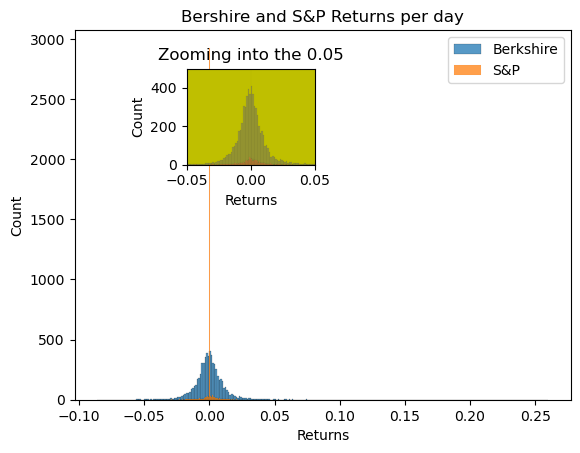

In [62]:
berkshire['Returns'] = (berkshire['close_BRK'] - berkshire['open_BRK']) / berkshire['open_BRK']
sns.histplot(data=berkshire['Returns'], label= "Berkshire")

s_p['Returns'] = (s_p['close_SP500'] - s_p['open_SP500']) / s_p['open_SP500']
sns.histplot(data=s_p['Returns'], label= "S&P")


plt.title('Bershire and S&P Returns per day')
plt.legend()


ax2 = plt.axes([0.3, 0.6, .2, .2], facecolor='y')
sns.histplot(s_p['Returns'], ax=ax2, color='orange')
sns.histplot(berkshire['Returns'], ax=ax2, color="blue", alpha =0.2)
ax2.set_title('Zooming into the 0.05')
ax2.set_xlim([-0.05,0.05])
ax2.set_ylim([0,500])


plt.show()

### Berkshire clearly has bigger returns over the long run.

## Absolute Daily Return Boxplot

In [71]:
berkshire['Ticker'] = 'BRK'
s_p['Ticker'] = 'SP500'
df = pd.concat([berkshire, s_p], ignore_index=True)
df = df[['Ticker', 'Returns']]


Text(0.5, 1.0, 'Berkshire and S&P Returns (No outliers)')

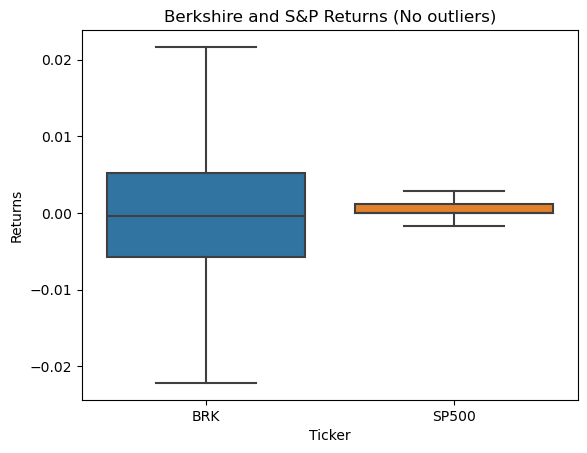

In [72]:
sns.boxplot(x='Ticker', y='Returns', data=df, showfliers = False)
plt.title('Berkshire and S&P Returns (No outliers)')

In [82]:
print(" Valuation of Berkshire (If bought on the lowest point):"+ str(math.ceil(berkshire['close_BRK'].max()/ berkshire['close_BRK'].min()*100)) + "%")
print(" Valuation of S%P Index (If bought on the lowest point):"+ str(math.ceil(s_p['close_SP500'].max()/ s_p['close_SP500'].min()*100)) + "%")
print("Dividends not included")

 Valuation of Berkshire (If bought on the lowest point):1313%
 Valuation of S%P Index (If bought on the lowest point):918%
Dividends not included


It's *visible* by statistics and visuals that the Berskhire performed way better than the S&P 500. But what would happen if we tried to predict the future? By how far the margin would it be? 

---

# Predicting the Future

As it's publicly known, the *stock market it's determined by random variables*, emotion, and news. So, a predicting method must be  aligned to this. The best option is the Monte Carlo method, which is based on stocasthic (random) theorems in order to solve problems which may seem like deterministic (stock market) but aren't.

In [66]:
import yfinance as yf
from scipy.stats import norm

So how is the price predicted?

![How is the price predicted?](https://miro.medium.com/v2/resize:fit:720/format:webp/1*o5bV1_qE79ZOKIQTJ8YC8w.png)

In [85]:
from pandas_datareader import data as wb
import seaborn as sns
from scipy.stats import norm

Standardizing the data into a logarithmic distribution

C:\Users\PC\AppData\Local\Temp\ipykernel_2608\2338201958.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0, 0.5, 'Frequency')

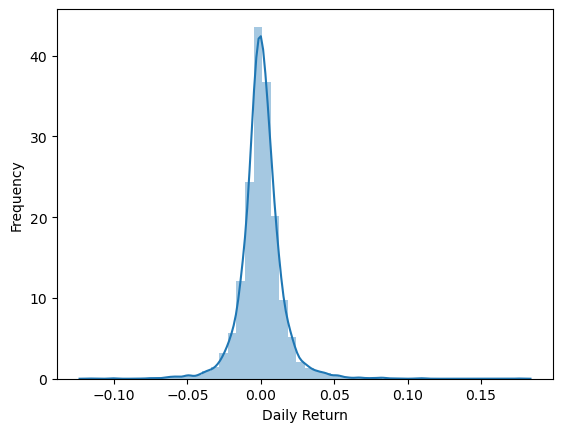

In [89]:
log_return = np.log(1 + berkshire['close_BRK'].pct_change())
#Plot
sns.distplot(log_return.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [91]:
u = log_return.mean()
var = log_return.var()
drift = u - (0.5*var)

In [107]:
stdev = log_return.std()
days = 50
trials = 10
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift + stdev * Z)

In [108]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = berkshire['close_BRK'].iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

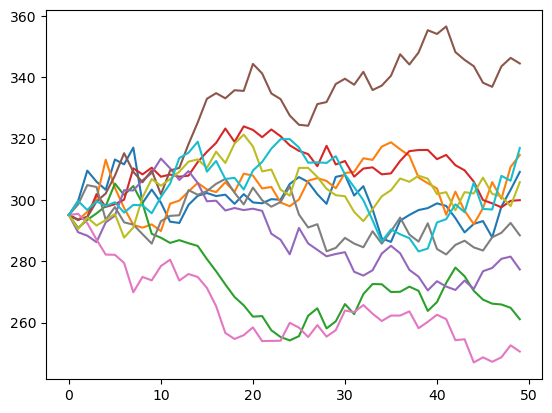

In [109]:
plt.plot(price_paths)
plt.show()